In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

In [2]:
df = pd.read_csv('zomato.csv',encoding = "ISO-8859-1")
df = df[df['Country Code']==1] # only indian restaurants

### 1. Summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.

##### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

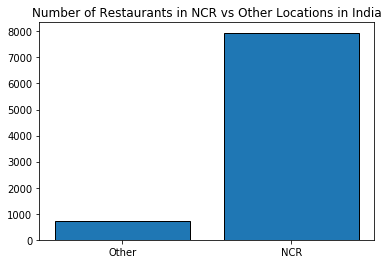

In [36]:
ncr = ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
d = {} #keys: NCR and Other with values = number of resturants in NCR and rest of India respectively
for _,row in df.iterrows(): #iterate over df
    if row['City'] in ncr:
        d['NCR']=d.get('NCR',0)+1
    else:
        d['Other']=d.get('Other',0)+1

plt.bar(d.keys(),d.values(), edgecolor = 'black')
plt.title("Number of Restaurants in NCR vs Other Locations in India")
plt.show()

##### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [38]:
d = {'NCR':[],'Other':[]} #dictionary of lists containing cuisines offered by restaurants in ncr and other places in india
for _,row in df.iterrows():
    flag = 0 # reset value of flag(used to check if restuarant is in NCR or somewhere else)
    cuisines = row['Cuisines'].strip().split(',') # cuisines is a list of all cuisines served by the resturant
    if row['City'] in ncr:
        flag = 1
    for c in cuisines:
        c=c.strip()
        if flag==1:
            if c not in d['NCR']:
                d['NCR'].append(c.strip())
        else:
            if c not in d['Other']:
                d['Other'].append(c.strip()) 
                
print("Cuisines available in India but not in Delhi NCR: \n")
for cuisine in d['Other']:
    if cuisine not in d['NCR']:
        print(cuisine)
        
# from Zomato API, BBQ is available in New Delhi. Thus the cuisines are absent due to incomplete dataset

Cuisines available in India but not in Delhi NCR: 

German
Malwani
BBQ
Cajun


##### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [15]:
d={'NCR':{},'Other':{}} # nested dictionary to store number of resturants(value) serving a specific cuisine(key)
for _,row in df.iterrows():
    flag = 0 # reset flag 
    cuisines = row['Cuisines'].strip().split(',')
    if row['City'] in ncr:
        flag = 1
    for c in cuisines:
        c=c.strip()
        if flag==1:
            d['NCR'][c]=d['NCR'].get(c,0)+1
        else:
            d['Other'][c]=d['Other'].get(c,0)+1  

top_cuisines_ncr = sorted(d['NCR'].items(), key=itemgetter(1), reverse=True) # sort dictionary created above by value in decreasing order
top_cuisines_other = sorted(d['Other'].items(), key=itemgetter(1), reverse=True) # list of tuples (cuisine, number)

print("Top 10 cuisines in Delhi-NCR: \n")
for i in range(10):
    x = top_cuisines_ncr[i]
    print("%s. %s" % (i+1,x[0]))
    
print("\nTop 10 cuisines in Rest of India: \n")
for i in range(10):
    x = top_cuisines_other[i]
    print("%s. %s" % (i+1,x[0]))

Top 10 cuisines in Delhi-NCR: 

1. North Indian
2. Chinese
3. Fast Food
4. Mughlai
5. Bakery
6. South Indian
7. Continental
8. Desserts
9. Street Food
10. Italian

Top 10 cuisines in Rest of India: 

1. North Indian
2. Chinese
3. Continental
4. Italian
5. Cafe
6. Fast Food
7. South Indian
8. Mughlai
9. Desserts
10. Mexican


##### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

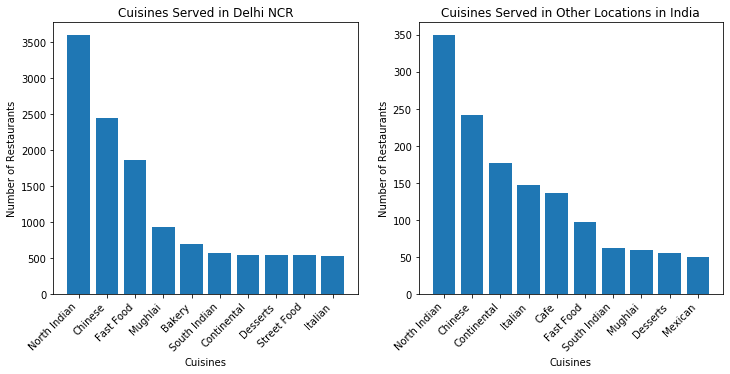

In [16]:
cuisines = [[],[]] #first inner list corresponds to NCR and second to other places in india
counts = [[],[]]
for j in range(2):
    for i in range(10):
        if j==0:
            x = top_cuisines_ncr[i]
        else:
            x = top_cuisines_other[i]
        cuisines[j].append(x[0])
        counts[j].append(x[1])


# plot top 10 cuisines served in NCR and rest of India
fig,axs = plt.subplots(1,2, figsize=(12,5)) #to make plots side by side
    
i=0
for ax in fig.axes:
    plt.sca(ax)
    plt.bar(cuisines[i],counts[i])
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.xlabel("Cuisines")
    plt.ylabel("Number of Restaurants")
    title = "Cuisines Served in "
    if i==0:
        title+="Delhi NCR"
    else:
        title+="Other Locations in India"
    plt.title(title)
    i+=1
    
plt.show()

#### Analysis
 - Number of restaurants in Delhi NCR is much higher than the number of restaurants everywhere else in India
 - Fast Food is the third most served cuisine in Delhi NCR whereas it is Continental for the rest of India
 - North Indian, Chinese and Fast Food are the most popular cuisines in Delhi NCR. There is a sharp decrease in popularity from here onwards whereas the decrease is gradual everywhere else.
 - Mughlai and Bakery are also popular in Delhi NCR. Remaining 5 cuisines share similar popularity.

### User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant  
2. Restaurant serving more number of cuisines  
3. Average Cost of Restaurant  
4. Restaurant serving some specific cuisines  

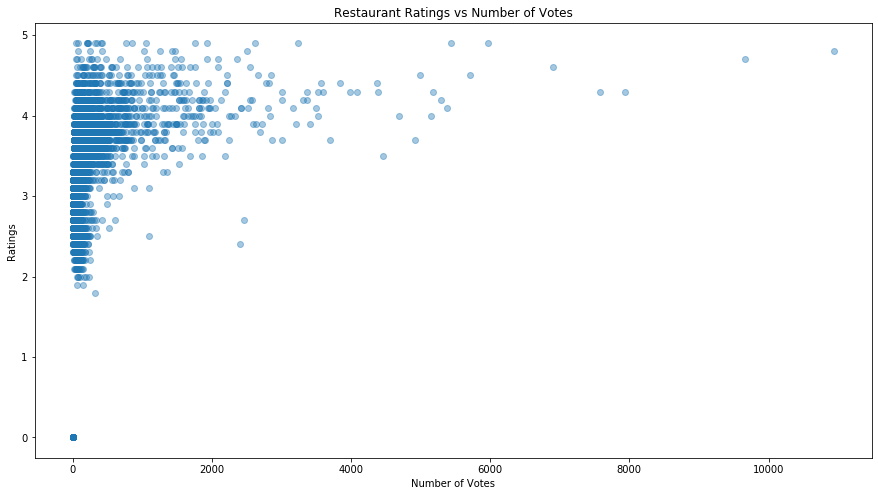

In [17]:
# 1. Aggregate Rating(y) vs Votes(x) 
plt.figure(figsize=(15,8))
plt.scatter(list(df['Votes']),list(df['Aggregate rating']),alpha=0.4)
plt.xlabel("Number of Votes")
plt.ylabel("Ratings")
plt.title("Restaurant Ratings vs Number of Votes")
plt.show()

In [18]:
# 2. Aggregate rating vs No of cuisines served

# add col number_of_cuisines to df
number_cuisines = []
for _,row in df.iterrows(): #iterate over dataframe
    cuisines = row['Cuisines'].strip().split(',') # list of cuisines served by the restaurant
    n = len(cuisines) # number of cuisines served by the restaurant
    number_cuisines.append(n)
    
df['Number of Cuisines'] = number_cuisines

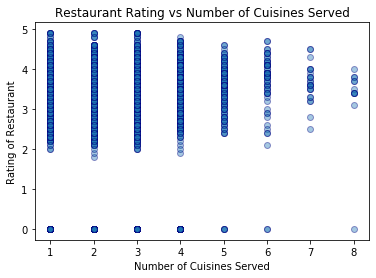

In [19]:
# create required plot
plt.scatter(list(df['Number of Cuisines']),list(df['Aggregate rating']), alpha=0.4, edgecolors='navy')
plt.xlabel("Number of Cuisines Served")
plt.ylabel("Rating of Restaurant")
plt.title("Restaurant Rating vs Number of Cuisines Served")
plt.show()

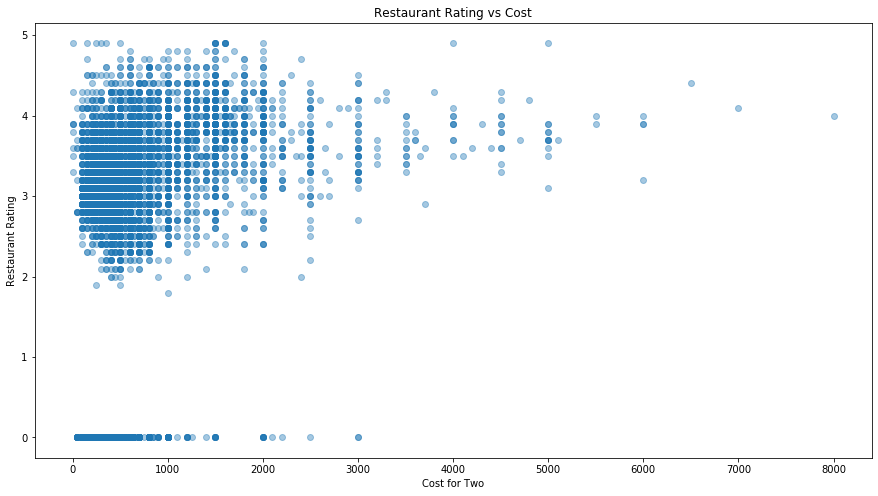

In [20]:
# 3. Aggregate rating vs Average Cost of Restaurant (Average Cost for two)
plt.figure(figsize=(15,8))
plt.scatter(df['Average Cost for two'], df['Aggregate rating'],alpha=0.4)
plt.xlabel("Cost for Two")
plt.ylabel("Restaurant Rating")
plt.title("Restaurant Rating vs Cost")
plt.show()

In [41]:
# 4. Aggregate rating vs Restaurant serving some specific cuisines
d = {} # key corresponds to cuisine whose value is a list which contains ratings
for _,row in df.iterrows():
    cuisines = row['Cuisines'].strip().split(',')
    rating = row['Aggregate rating']
    for c in cuisines:
        c = c.strip()
        if c not in d:
            d[c]=[rating]
        else:
            d[c].append(rating)

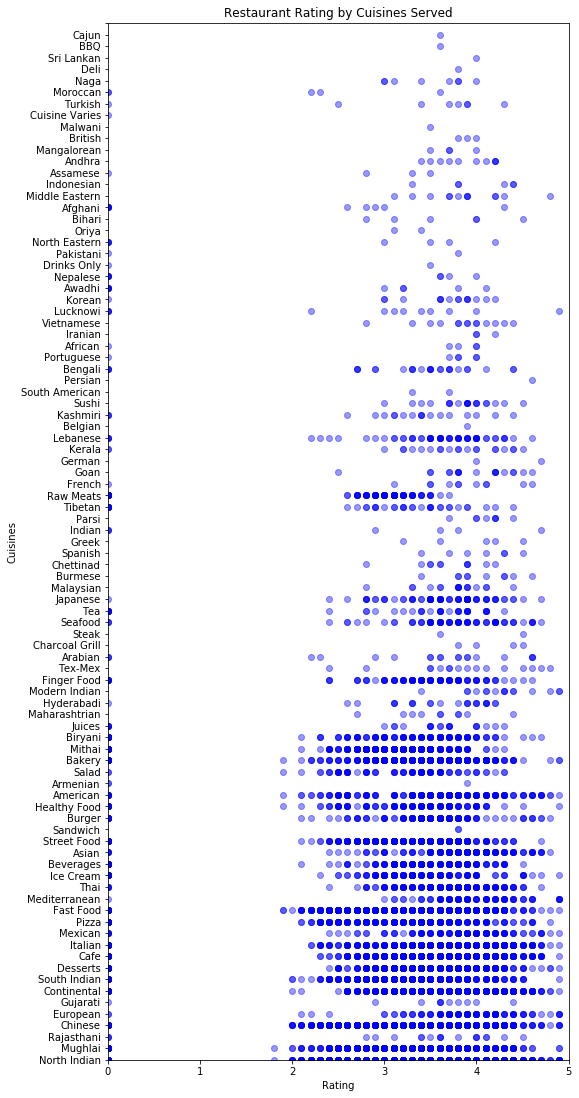

In [43]:
#plotting 
cuisines = list(d.keys())
fig = plt.figure(figsize=(8,18))
ax = fig.add_axes([1, 1, 0.8, 0.8])

ax.set_xlabel('Rating')
ax.set_ylabel("Cuisines")
ax.set_title('Restaurant Rating by Cuisines Served')
ax.set_xticks([0,1,2,3,4,5])
ax.set_yticklabels(cuisines)
ax.set_yticks(np.arange(len(cuisines)+1))
plt.axis([0,5,0,len(cuisines)])
ax.set_yticklabels(cuisines)

for i in range(len(cuisines)):
    for r in d[cuisines[i]]:
        plt.plot(r,i,'bo',alpha=0.4,)

plt.show()

### Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [ ]:
# d = {} #locality:[[votes],[ratings]]
# for _,row in df.iterrows():
#     locality = row['Locality']
#     votes = row['Votes']
#     rating = row['Aggregate rating']
#     if locality in d:
#         d[locality][0] = np.append(d[locality][0],votes)
#         d[locality][1] = np.append(d[locality][1],rating)
#     else:
#         d[locality]=[np.array([votes]),np.array([rating])]    

# weighted_rating = {} # Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
# # d #locality:[[votes],[ratings]]
# for locality,v in d.items():
#     votes = v[0]
#     ratings = v[1]
#     num = votes*ratings
#     if votes.sum()!=0:
#         weighted_rating[locality]=num.sum()/votes.sum()     

In [23]:
d = {}  # is a dictionary whose keys correspond to localities with their values being tuples as (votes, rating)
for _,row in df.iterrows(): #iterating over df
    locality = row['Locality']
    votes = row['Votes']
    rating = row['Aggregate rating']
    if locality in d:
        d[locality][0].append(votes)
        d[locality][1].append(rating)
    else:
        d[locality]=([votes],[rating]) 

In [24]:
weighted_rating = {} # dictionary that will contain weighted rating as values with localities as their keys 
localities_with_no_votes = [] #list of localities without votes. not neccessarily required.
for locality,v in d.items():
    votes = v[0]
    ratings = v[1]
    num = 0
    for i in range(len(votes)):
        num+=votes[i]*ratings[i]
    if sum(votes)==0:
        localities_with_no_votes.append(locality) # ignoring restuarants with 0 votes (result in division by 0 error)
    else:
        wr = num/sum(votes)
        weighted_rating[locality]=wr

In [29]:
weighted_ratings = sorted(weighted_rating.items(), key=itemgetter(1), reverse=True) # to sort dictionary created above by value in decreasing order
print("Top Ten Localities with Highest Weighted Rating: \n")
for i in range(10):
    t = weighted_ratings[i]
    print("%s. %s: %s" % (i+1,t[0],'{:.2f}'.format(round(t[1],2)))) #rating rounded off to 2 decimal places

Top Ten Localities with Highest Weighted Rating: 

1. Hotel Clarks Amer, Malviya Nagar: 4.90
2. Aminabad: 4.90
3. Friends Colony: 4.89
4. Powai: 4.84
5. Kirlampudi Layout: 4.82
6. Express Avenue Mall,  Royapettah: 4.80
7. Deccan Gymkhana: 4.80
8. Banjara Hills: 4.72
9. Sector 5, Salt Lake: 4.71
10. Riverside Mall, Gomti Nagar: 4.70


### Visualization
1. Plot the bar graph top 15 restaurants have a maximum number of outlets.
2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.
4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.
5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [44]:
# 1. Top 15 restaurants having maximum number of outlets
d = {} #key: restaurant chain, value: number of outlets
for _,row in df.iterrows(): #iterating over df
    name = row['Restaurant Name']
    d[name]=d.get(name,0)+1

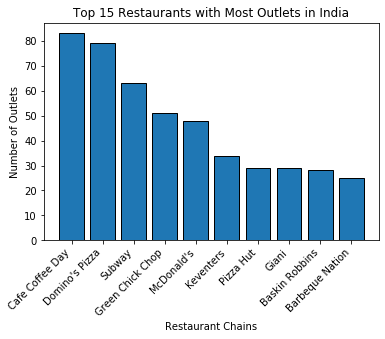

In [48]:
names = []
counts = []
restaurant_outlets = sorted(d.items(), key=itemgetter(1), reverse=True)[0:15] # to sort dictionary created above by value in decreasing order
for i in range(10):
    t = restaurant_outlets[i]
    names.append(t[0])
    counts.append(t[1])
    
plt.bar(names,counts,edgecolor='black')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel("Restaurant Chains")
plt.ylabel("Number of Outlets")
plt.title('Top 15 Restaurants with Most Outlets in India')
plt.show()

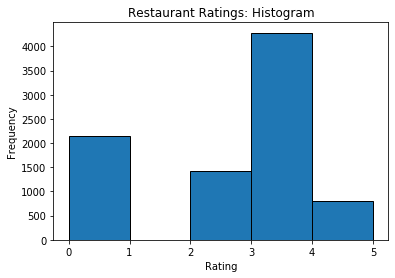

In [30]:
# 2. Histogram of aggregate rating
plt.hist(list(df['Aggregate rating']), edgecolor = 'black', bins = [0,1,2,3,4,5])
plt.xticks(np.arange(6))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title("Restaurant Ratings: Histogram")
plt.show()

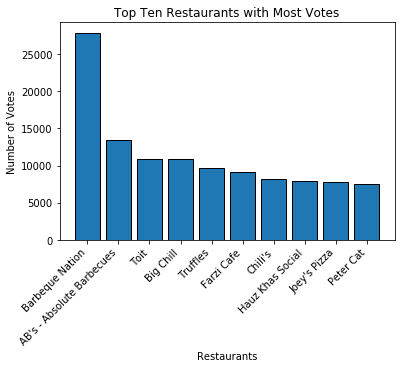

In [31]:
# 3. bar graph of top 10 restaurants with highest number of votes
d = {} # stores restaurant names as keys and votes as their values
for _,row in df.iterrows():
    votes = row['Votes']
    name = row['Restaurant Name']
    d[name]=d.get(name,0)+votes

top_voted = sorted(d.items(), key=itemgetter(1), reverse=True)[:10] # sort in descending order to obtain top ten
names = []
votes = []
for t in top_voted:
    names.append(t[0])
    votes.append(t[1])

plt.bar(names,votes, edgecolor = 'black')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel("Restaurants")
plt.ylabel("Number of Votes")
plt.title('Top Ten Restaurants with Most Votes')
plt.show()

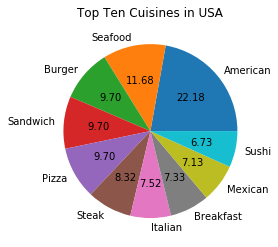

In [32]:
# 4. Plot the pie graph of top 10 cuisines present in restaurants in the USA

df = pd.read_csv('zomato.csv',encoding = "ISO-8859-1") 
df = df[df['Country Code']==216] #df for restaurants in USA 
df.dropna(subset = ['Cuisines'],inplace = True) # drop rows with NaN cuisine values

d={} #stores cuisines as keys and the total number of locations that serve the cuisine as value
for _,row in df.iterrows():
    cuisines = row['Cuisines'].strip().split(',')
    for c in cuisines:
        c=c.strip()
        d[c]=d.get(c,0)+1
        
top_cuisines = sorted(d.items(), key=itemgetter(1), reverse=True)[:10] #sort to find top 10
names = []
counts = []

for t in top_cuisines:
    names.append(t[0])
    counts.append(t[1])

plt.pie(counts,labels=names,autopct='%.2f')
plt.title("Top Ten Cuisines in USA")
plt.show()

In [33]:
# Plot the bubble graph of a number of Restaurants present in the city of India 
# and keeping the weighted restaurant rating of the city in a bubble.

#Finding weighted restaurant rating of indian cities
df = pd.read_csv('zomato.csv',encoding = "ISO-8859-1")
df = df[df['Country Code']==1] # only indian restaurants

d = {}  # dictionary that uses cities as keys with a tuple ([votes],[rating]) as their value
for _,row in df.iterrows():
    city = row['City']
    votes = row['Votes']
    rating = row['Aggregate rating']
    if city in d:
        d[city][0].append(votes)
        d[city][1].append(rating)
    else:
        d[city]=([votes],[rating]) 
        
weighted_rating = {} # stores city as key with its weighted rating as value
cities_with_no_votes = []
for city,v in d.items():
    votes = v[0]
    ratings = v[1]
    num = 0
    for i in range(len(votes)):
        num+=votes[i]*ratings[i]
    if sum(votes)==0:
        cities_with_no_votes.append(city) # ignoring restuarants with 0 votes (result in division by 0 error)
    else:
        wr = round(num/sum(votes),2)
        weighted_rating[city]=wr
        
        
number_of_restaurants_by_city = {} # stores city as key and number of restaurants in that city as value
for _,row in df.iterrows():
    city = row['City']
    number_of_restaurants_by_city[city]=number_of_restaurants_by_city.get(city,0)+1

cities = list(number_of_restaurants_by_city.keys())

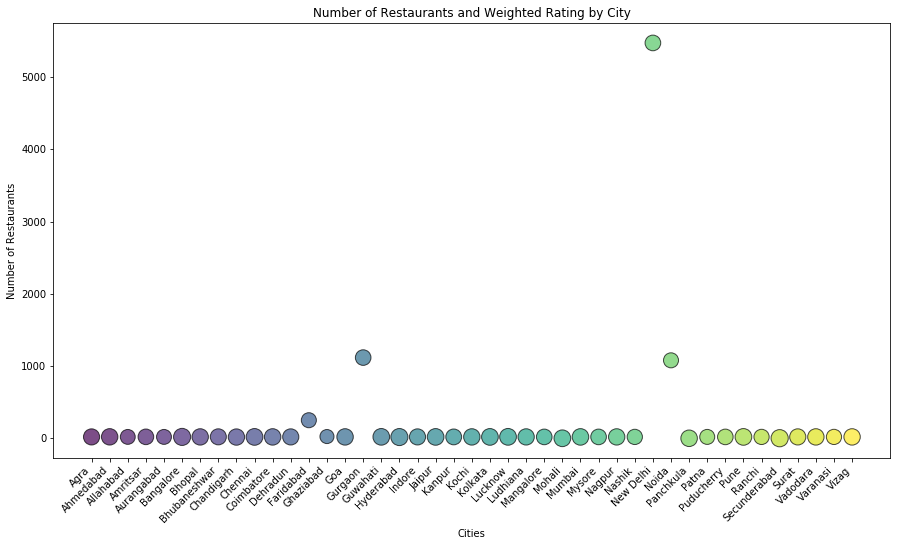

In [34]:
c = np.arange(len(cities))
number_counts = list(number_of_restaurants_by_city.values())
wratings = np.array(list(weighted_rating.values())) # converting list to np array for element wise multiplication to enlarge bubble size
plt.figure(figsize=(15,8))
plt.scatter(cities,number_counts,s=[65*wratings],c = c,edgecolors='black',alpha=0.7)
plt.title("Number of Restaurants and Weighted Rating by City")
plt.xlabel("Cities")
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Number of Restaurants")
plt.show()

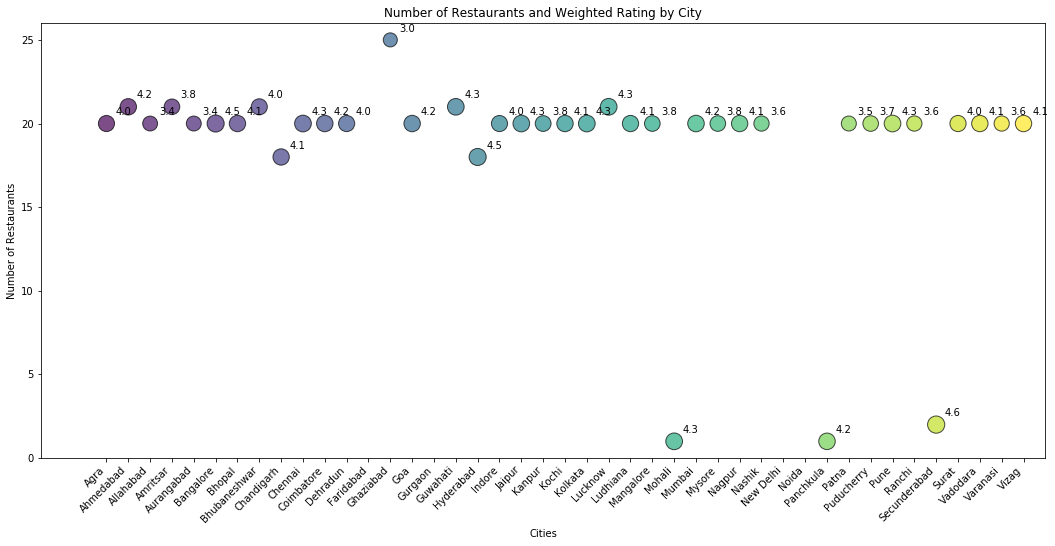

In [35]:
# Most data is contained in this region
plt.figure(figsize=(18,8))
plt.scatter(cities,number_counts,s=[65*wratings],c = c,edgecolors='black',alpha=0.7)
plt.title("Number of Restaurants and Weighted Rating by City")
plt.xlabel("Cities")
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Number of Restaurants")

wratings = np.round(wratings,1) #ratings rounded to 1 decimal place
for i in range(len(wratings)):
    if number_counts[i]<26:
        plt.text(i+0.4,number_counts[i]+0.5,wratings[i])
plt.axis([-3,len(cities),0,26])
plt.show()